<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/Final_Portfolio_Project/Final_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Portfolio Project

**Project Objectives:**
* Complete a project to add to a portfolio
* Use Git version control
* Use Jupyter Notebook to communicate findings
* Run an end-to-end data science project
* Become familiar with data science workflows

**Prerequisites:**
* Natural Language Processing
* Supervised Machine Learning
* Unsupervised Machine Learning
* Deep Learning
* Big Data

# Project Scope

*   Goals
  * I'd like to use the data in the restaurant score file described below to determine the following:
      * Are there tendencies in the data such as higher or lower scores by area (ex: post code)
      * Are there features in the data that could predict the the outcome(s) of an inspection?
        * The column 'inspection_type' for example gives me the impression that when the inspection is unscheduled, there are more violations.
      * Are there sufficient features in the dataset that will allow us to predict a high or low score?

*   Data
  * The file "Restaurant_Scores_-_LIVES_Standard.csv" contains information from restaurant inspections by the Health Department. The file contains restaurant names, addresses, etc. as well as inspection information such as tpye, score, and violations.
  * The data has been sourced from the DataSF website - the San Francisco, California Open Data program: https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i?row_index=0
  * Additional information about the data can be found at the following links:
      * https://docs.google.com/document/d/1eeO5T_lt8QHGHMjpj6M9071y5OFOXcADFI4F7AIZ2iE/edit
      * https://www.yelp.com/healthscores
*   Analysis



In [ ]:
#@title Code: Import libraries
#Required to update the path statement to import a PY file from project folder
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression

#Set the path to the current project folder
#If permanently mounting via the notebook
projectFolder = './drive/My Drive/Colab Notebooks/Codecademy/Final Portfolio Project/'

#Update the path statement so that we can import our PY files for this project
sys.path.insert(1, projectFolder)

In [20]:
#@title Code: Method definitions
#Print out information about a specific column in the dataframe
def colInfo(df, column):
  print("Column: "+column)
  print(df[column].unique())
  print("Unique values:")
  tNaN = df[column].isna().sum()
  total = len(df.values)
  ptNaN = (tNaN / total)*100
  print(f"Number of unique values: {len(df[column].unique())}")
  print(f"NaN entries: {tNaN} out of {total} or {ptNaN:.2f}%")
  print("\n")

  return None

In [165]:
#@title Code: Import Data
scoresDF = pd.read_csv(projectFolder+"Restaurant_Scores_-_LIVES_Standard.csv", header=0, delimiter=";")
scoresDF.head(10)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,101192_20190606,06/06/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79804,CurveBall,428 11th St,San Francisco,CA,94103,NaN,NaN,NaN,1.415029e+10,79804_20190325,03/25/2019 12:00:00 AM,NaN,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78070,Uno Dos Taco,595 Market St Suite 160,San Francisco,CA,94105,NaN,NaN,NaN,NaN,78070_20190711,07/11/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95071,95071 Portable 1 Doggie Diner,24 Willie Mays Pl Section 106,San Francisco,CA,94107,NaN,NaN,NaN,NaN,95071_20190412,04/12/2019 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83612,Lobster ME,845 Market St FE15,San Francisco,CA,94103,NaN,NaN,NaN,NaN,83612_20190725,07/25/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,NaN,NaN,NaN,NaN,101084_20190807,08/07/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,97199,ENHYDRA,PIER 43 1/2,San Francisco,CA,94133,NaN,NaN,NaN,NaN,97199_20180925,09/25/2018 12:00:00 AM,NaN,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5982,SF Senior Center at Aquatic Park Meals Program,890 Beach St,San Francisco,CA,94109,37.806258,-122.423704,"(37.806258, -122.423704)",NaN,5982_20190514,05/14/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,32.0,1.0,1.0,5.0,"28,858",32.0
8,93835,Japanese House,480 6th St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,93835_20190312,03/12/2019 12:00:00 AM,82.0,Routine - Unscheduled,93835_20190312_103150,Improper or defective plumbing,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
9,91232,Castro Ice Cream,451 Castro St,San Francisco,CA,94114,NaN,NaN,NaN,1.415588e+10,91232_20190214,02/14/2019 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [116]:
#@title Code: Inspect Data

print(scoresDF.info())

_ = [colInfo(scoresDF, c) for c in ['business_postal_code', 'inspection_score'\
                                    , 'inspection_type', 'violation_id',\
                                    'risk_category', 'Analysis Neighborhoods']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52745 entries, 1 to 53929
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                52745 non-null  int64  
 1   business_name              52745 non-null  object 
 2   business_address           52745 non-null  object 
 3   business_city              52745 non-null  object 
 4   business_state             52745 non-null  object 
 5   business_postal_code       52745 non-null  object 
 6   business_latitude          27137 non-null  float64
 7   business_longitude         27137 non-null  float64
 8   business_location          27137 non-null  object 
 9   business_phone_number      17116 non-null  float64
 10  inspection_id              52745 non-null  object 
 11  inspection_date            52745 non-null  object 
 12  inspection_score           38680 non-null  float64
 13  inspection_type            52745 non-null  obj

In [86]:
#@title Code: Check 'inspection_id' for duplicates
#Check for duplicates on column 'inspection_id'
print("\nNumber of duplicates rows for 'inspection_id'")
print(scoresDF.duplicated(subset=['inspection_id']).value_counts())

sampleRows = scoresDF[scoresDF['inspection_id'] == '1000_20171002']
print("\nA sample of duplicate 'inspection_id' entries:")
sampleRows


Number of duplicates rows for 'inspection_id'
True     27310
False    26663
dtype: int64

A sample of duplicate 'inspection_id' entries:


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
18134,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103161,Low risk vermin infestation,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
21809,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103154,Unclean or degraded floors walls or ceilings,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
28930,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103142,Unclean nonfood contact surfaces,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
38806,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103132,Improper thawing methods,Moderate Risk,19.0,4.0,7.0,2.0,"28,859",20.0
44753,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103139,Improper food storage,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
47026,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103109,Unclean or unsanitary food contact surfaces,High Risk,19.0,4.0,7.0,2.0,"28,859",20.0
53647,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103103,High risk food holding temperature,High Risk,19.0,4.0,7.0,2.0,"28,859",20.0


In [87]:
#@title Code: Check 'violation_id' for duplicates
#Check for duplicates on column 'violation_id'
print("\nNumber of duplicates rows for 'violation_id'")
print(scoresDF.duplicated(subset=['violation_id']).value_counts())

sampleRows = scoresDF[scoresDF['violation_id'] == '984_20170726_103142']
print("\nA sample of duplicate 'violation_id' entries:")
sampleRows


Number of duplicates rows for 'violation_id'
False    40211
True     13762
dtype: int64

A sample of duplicate 'violation_id' entries:


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
17352,984,VANIDA THAI KITCHEN,3050 TARAVAL St,San Francisco,CA,94116,37.742086,-122.498738,"(37.742086, -122.498738)",NaN,984_20170726,07/26/2017 12:00:00 AM,65.0,Routine - Unscheduled,984_20170726_103142,Unclean nonfood contact surfaces,Low Risk,35.0,8.0,3.0,1.0,"29,491",35.0
19081,984,VANIDA THAI KITCHEN,3050 TARAVAL St,San Francisco,CA,94116,37.742086,-122.498738,"(37.742086, -122.498738)",NaN,984_20170726,07/26/2017 12:00:00 AM,65.0,Routine - Unscheduled,984_20170726_103142,Unclean nonfood contact surfaces,Low Risk,35.0,8.0,3.0,1.0,"29,491",35.0


In [141]:
#@title Code: Show duplicates for dataset
print("\nNumber of duplicates on the entire dataset:")
duplicateSeries = scoresDF.duplicated()
print(duplicateSeries.value_counts())

duplicateKeys = []
for k,v in duplicateSeries.iteritems():
  if(v == True): duplicateKeys.append(k)

print(scoresDF.iloc[duplicateKeys])


Number of duplicates on the entire dataset:
False    53930
True        43
dtype: int64
       business_id                business_name         business_address  business_city business_state business_postal_code  business_latitude  business_longitude         business_location  business_phone_number   inspection_id         inspection_date  inspection_score                  inspection_type           violation_id                                                      violation_description  risk_category  Neighborhoods (old)  Police Districts  Supervisor Districts  Fire Prevention Districts Zip Codes  Analysis Neighborhoods
1840         77427             Diamond Cafe LLC           751 Diamond St  San Francisco             CA                94114                NaN                 NaN                       NaN           1.415529e+10  77427_20170706  07/06/2017 12:00:00 AM              94.0            Routine - Unscheduled  77427_20170706_103161                                                L

In [145]:
groupedDF = scoresDF.groupby('business_postal_code').inspection_id.count().reset_index()
print(groupedDF)

   business_postal_code  inspection_id
0                 00000              6
1                 64110              6
2                 92672              9
3                 94013              8
4                 94014              2
5                 94080              9
6                   941              7
7                 94101             30
8                 94102           3784
9            94102-5917              3
10                94103           4866
11            941033148              5
12                94104           1137
13                94105           2103
14           94105-1420              1
15           94105-2907              2
16                94107           2718
17                94108           2008
18                94109           3687
19                94110           5915
20            941102019              7
21                94111           1772
22                94112           2333
23                94114           1671
24                94115  

##Observations of data

* General observations
  * There are 53,973 rows in the file.
  * The data is highly structured and does not require much preparation.
  * The columns 'inspection_id' and 'violation_id' contain underscore seperated values that I will likely split out to make use of (more information below in duplicates.) 'violation_id' is prepended by 'inspection_id' which is appended by the data of the inspection (in YYYYMMDD format.)
* Duplicates
  * There appears to be 43 duplicate rows in the dataset.
  * A deeper look:
    * There appears to be 13,762 duplicate rows when controlled using the column 'violation_id'. The violation_id 984_20170726_103142 shows an example of a duplicate entry.
    * The value in the column 'inspection_id' contains a unique identifier for a given inspection. However, it would appear that over half of the 53k rows contain duplicate 'inspection_id'.
    * Looking at a sample of rows from the inspection_id 1000_20171002 we see that in fact an inspection can contain multiple rows (entries) one for each of the number of violtaions (violation_id) made during the inspection.
* "Nan" values
  * There are many entries with "NaN" values. 
  * I will have to handle these entries above all for 'inspection_score', 'violation_id', and 'risk_category'
* Misc.
  * The column 'business_postal_code' contains erroneous data (such as 00000 and 941.) The data in this column will need to be tidied up.
    * All post codes in the San Francisco area are of 6 digits in length and start with '941'. Any rows that do not meet the criteria will be dropped.

# Data Preperation

In [173]:
#@title Code: Data preparation

#Drop duplicates, keep last entry
scoresDF.drop_duplicates(inplace=True, ignore_index=True, keep='last')
scoresDF.dropna(subset=['business_postal_code'], inplace=True)

#Filter out rows where business_postal_code does not start with 941 and whose lenght is less than 4
scoresDF = scoresDF[scoresDF['business_postal_code'].map(len) > 3]
scoresDF = scoresDF[scoresDF.business_postal_code.str.contains('^941', regex=True, na=False)]

#Now merge values where the postal code has a 'sub-code' appended

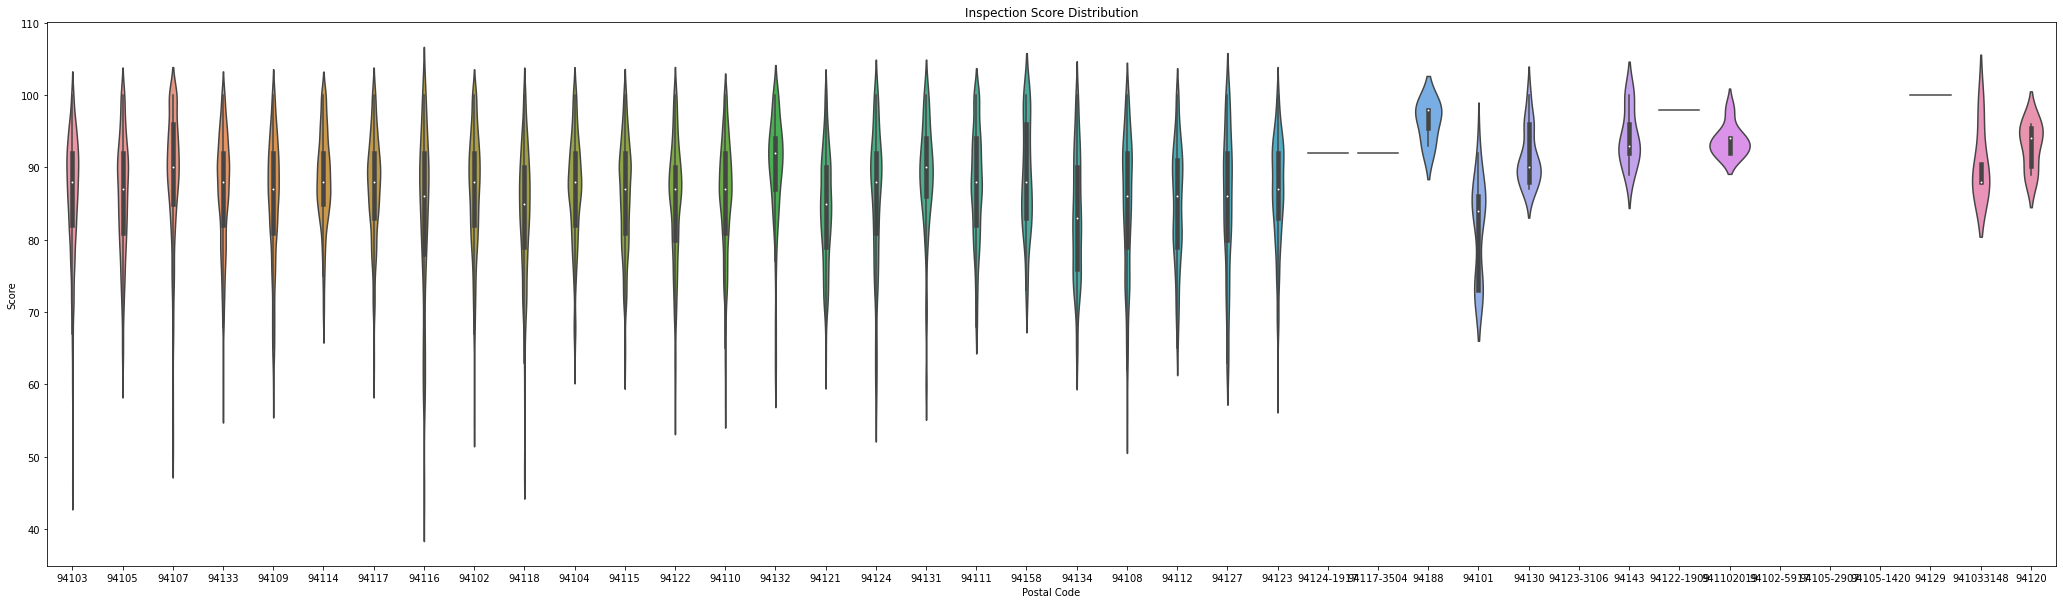

In [174]:
plt.figure(figsize=[36,10])
ax = sns.violinplot()

sns.violinplot(data=scoresDF, x="business_postal_code", y="inspection_score")
ax.set_title("Inspection Score Distribution")
ax.set(xlabel='Postal Code', ylabel='Score')

#plt.savefig("netflix_quarterly_price_disti.png", format="png")

plt.show()